In [1]:
!nvidia-smi

Sat Jul 26 05:42:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


[Dataset LINK](https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw)

Download the Dataset in YOLOv11 format from Roboflow Universe

(Optional) Upload the dataset in Google Drive

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUnu2A7nCxAgdQLw25yF")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov11:: 100%|██████████| 14682/14682 [00:02<00:00, 6247.21it/s]


In [4]:
!cat /content/rock-paper-scissors-14/data.yaml

train: /content/rock-paper-scissors-14/train/images
val: /content/rock-paper-scissors-14/valid/images
test: /content/rock-paper-scissors-14/test/images

nc: 3
names: ['Paper', 'Rock', 'Scissors']

roboflow:
  workspace: roboflow-58fyf
  project: rock-paper-scissors-sxsw
  version: 14
  license: Private
  url: https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw/dataset/14

In [5]:
!yolo train model=yolo11n.pt data="/content/rock-paper-scissors-14/data.yaml" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 338MB/s]
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rock-paper-scissors-14/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

In [6]:
# Visualize the Predicted image function
import cv2
from google.colab.patches import cv2_imshow

def show_image(image_path):
    """
    Function to display an image using OpenCV in Google Colab.

    Parameters:
    - image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    cv2_imshow(image)

In [7]:
# Inferencing with the trained model

!yolo predict model="/content/runs/detect/train/weights/best.pt" source="/content/rock-paper-scissors-14/valid/images/IMG_5567_mp4-61_jpg.rf.771eb566154f3d4116cc264ef8c65440.jpg"

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/rock-paper-scissors-14/valid/images/IMG_5567_mp4-61_jpg.rf.771eb566154f3d4116cc264ef8c65440.jpg: 640x640 1 Scissors, 13.1ms
Speed: 2.6ms preprocess, 13.1ms inference, 146.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


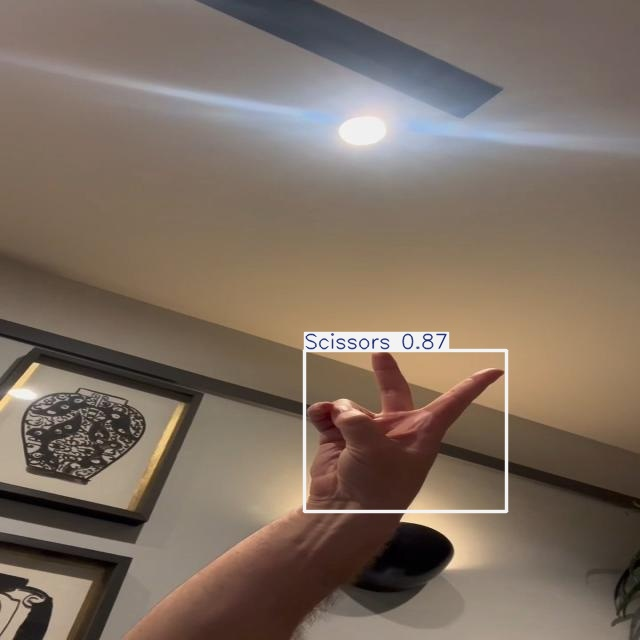

In [8]:
show_image("/content/runs/detect/predict/IMG_5567_mp4-61_jpg.rf.771eb566154f3d4116cc264ef8c65440.jpg")

In [9]:
!yolo predict model="/content/runs/detect/train/weights/best.pt" source="/content/rock-paper-scissors-14/test/images/IMG_5636_MOV-31_jpg.rf.372f95db69cc8886d4d02032d4ebf34e.jpg"

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/rock-paper-scissors-14/test/images/IMG_5636_MOV-31_jpg.rf.372f95db69cc8886d4d02032d4ebf34e.jpg: 640x640 1 Rock, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 138.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


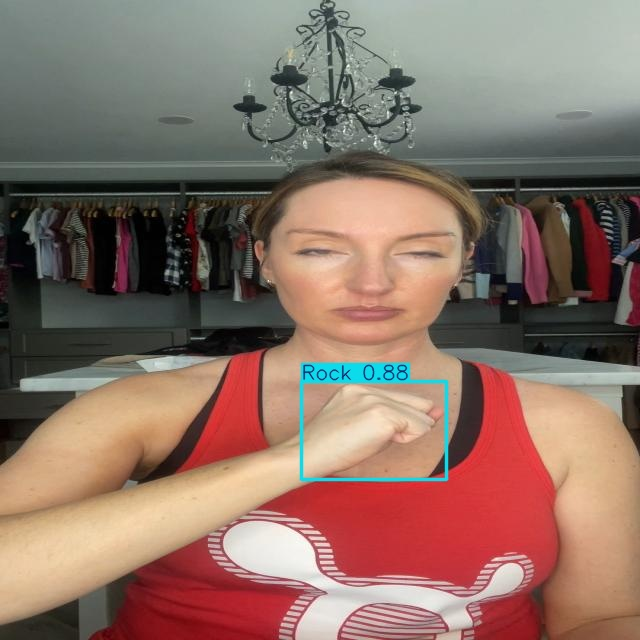

In [10]:
show_image("/content/runs/detect/predict2/IMG_5636_MOV-31_jpg.rf.372f95db69cc8886d4d02032d4ebf34e.jpg")

In [16]:
!yolo export model="/content/yolo11n.pt" format=onnx

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/content/yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 1.7s, saved as '/content/yolo11n.onnx' (10.2 MB)

Export complete (2.3s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


In [17]:
!yolo export model="/content/yolo11n.pt" format=engine

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/content/yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 8.3s, saved as '/content/yolo11n.onnx' (10.2 MB)
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 80.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorRT: startin